#### __Exploratory Data Analisys and Hypothesis testing__

__Description:__  publishers offer to buyers advertisment space on their online web/app services. Buyers bid to show their ads to end users of publishers services.The dataset is set of transaction data collected. 

__Dataset:__

Field | Description |
---:|:---:| 
**account** |publisher's account identifier |
**browser** | user's web browser |
**device** | user's device | 
**country** | country the user is connecting from | 
**medium** | medium for which the ad is being requested one of 'web','video','app' | 
**transaction_time** | user's device | 
**bid** | top bid in the auction in units of micro=cpm US dollars, _cpm_ is cost per mile|
**min_bid_to_win** | minimum bid required to win the auction | 
**win** | boolean indicating whether ir nit hte auction was won  | 


#### Data cleaning and transformation 

In [1]:
#load data
import pandas as pd

df = pd.read_csv('./data.csv')

print('data file size', df.size)
print('Number of records',df.shape)

data file size 8999496
Number of records (999944, 9)


In [2]:
df.sample(5)


,account,browser,device,country,medium,transaction_time,bid,min_bid_to_win,win
51290,ClberDLm,mobile safari,iPad,us,app,1592956817,110,5769.0,False
504766,0HNIZL9k,chrome,PRA-LX1,it,web,1593002574,102,382.0,False
731520,4D4+7N1w,chrome,LM-Q910,ca,web,1593014477,220,267.0,False
664057,YVjbrwa+,chrome,browser,pl,web,1593010316,12,28.0,False
560345,9zpgQRJc,chrome,iPhone,gb,web,1593020416,447,3208.0,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999944 entries, 0 to 999943
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   account           999944 non-null  object 
 1   browser           999944 non-null  object 
 2   device            994173 non-null  object 
 3   country           999944 non-null  object 
 4   medium            999944 non-null  object 
 5   transaction_time  999944 non-null  int64  
 6   bid               999944 non-null  int64  
 7   min_bid_to_win    997344 non-null  float64
 8   win               999944 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(5)
memory usage: 62.0+ MB


In [4]:
 
# is 'browser' in device column means other device than mobile
# I assume that device marked 'browser' is computer
print("Number of 'Browser' in device column", len(df[df.device=='browser']))
print()

Number of 'Browser' in device column 341510



In [5]:
# How many uniqe device 
print("Number of unique devices",len(df.device.value_counts()))
df.groupby('device').count().sort_values(ascending=False,by='account').head(10)

Number of unique devices 5846


,account,browser,country,medium,transaction_time,bid,min_bid_to_win,win
device,,,,,,,,
browser,341510,341510,341510,341510,341510,341510,340491,341510
iPhone,162422,162422,162422,162422,162422,162422,162116,162422
iPad,20223,20223,20223,20223,20223,20223,20176,20223
SM-G960U,13542,13542,13542,13542,13542,13542,13501,13542
SM-G950U,10328,10328,10328,10328,10328,10328,10313,10328
SM-G973U,8907,8907,8907,8907,8907,8907,8889,8907
SM-G965U,8745,8745,8745,8745,8745,8745,8724,8745
SM-G975U,8669,8669,8669,8669,8669,8669,8641,8669
SM-N960U,7571,7571,7571,7571,7571,7571,7551,7571


In [6]:
# creating OS column form device 

def detect_os(device):
    if device.find('iPhone')>=0 or device.find('iPad')>=0 : return 'iOS'
    elif device == 'browser': return 'computer'
    else: return 'Android'

df['device']=df.device.apply(str)
df['os']=df.device.apply(detect_os)

In [7]:
df.os.value_counts()

Android     461994
computer    341510
iOS         196440
Name: os, dtype: int64

In [8]:
# Number of uniqe browsers  
print('Number of browsers :', len(df.browser.value_counts()),'\n')
df.browser.value_counts()

Number of browsers : 34 



chrome                681246
mobile safari         187290
samsung browser        34704
internet edge          33691
safari                 22496
firefox                12397
internet explorer      10937
beamrise                5073
opera                   4089
amazon silk             4034
other                   2101
miui browser             964
yandex.browser           266
chromium                 153
android browser          136
uc browser                49
vivaldi                   46
maxthon                   45
aol browser               32
opera touch               31
iron                      29
puffin                    26
seamonkey                 26
coc coc browser           24
pale moon                 13
mqq browser               12
blackberry browser         8
aol shield                 7
opera mini                 6
seznam browser             4
jiobrowser                 4
outlook                    2
iceweasel                  2
firefox focus              1
Name: browser,

In [9]:
#value_counts with percentage 

def value_percent(column):
    df=(pd.DataFrame({'count':column.value_counts().values,
                        'percent':column.value_counts(normalize=True).values},
                        index=column.value_counts().index))
    df['percent']=round(df.percent*100,2)
    return df


In [10]:

 
# I left 5 most popular browser and the rest sum up as others 
browsers_left=('chrome','mobile safari','samsung browser',
                            'internet edge','safari')
                            
df['browsers']=df.browser.apply(lambda x:x if x in browsers_left else 'others')

value_percent(df.browsers)

,count,percent
chrome,681246,68.13
mobile safari,187290,18.73
others,40517,4.05
samsung browser,34704,3.47
internet edge,33691,3.37
safari,22496,2.25


In [11]:

#difference between bid and min_bid 
df['diff']=df.bid-df.min_bid_to_win

In [12]:
#How many uniqe countries 
print('NUmber of uniqe countries',len(df.country.value_counts()))

NUmber of uniqe countries 198


In [13]:

# 11 biggest countries left (90% of total turnover) and the rest are grouped as others.
# Numbers of countries left choosen the way visual analysis still available and others not to big

country_left=set(value_percent(df.country).head(11).index)
df['country_grouped']=df.country.apply(lambda x:'others' if x not in country_left else x)

value_percent(df.country_grouped)


,count,percent
us,611449,61.15
others,96836,9.68
de,47998,4.80
gb,46538,4.65
pl,40140,4.01
es,38671,3.87
it,31561,3.16
ca,29827,2.98
au,17887,1.79
fr,13923,1.39


In [14]:
#unique medium
df.medium.value_counts()

web      782891
app      179656
video     37397
Name: medium, dtype: int64

In [15]:
# how many unique customers 
print('ilu różnych klientów',len(df.account.value_counts()))
print(df.groupby('account').apply(len).sort_values(ascending=False))

ilu różnych klientów 203
account
MCDMv+l7    75162
rENgOiCv    29433
4D4+7N1w    20567
1JATooXh    19179
UvpUBH3I    18506
            ...  
k5FMFOMv     1399
03l9u/9p     1397
aNJ7VyO5     1383
TgukKzkb     1339
I74+1WCu     1309
Length: 203, dtype: int64


In [16]:

# replacing bizzar account name with numbers 

df['account_name']=df.account.replace(df.account.unique(),
                                    range(1,len(df.account.unique())+1))

In [17]:
# % of won bid
mean_won_bid_percent=round(sum(df.win)/len(df)*100,2)
print('% of bid won', mean_won_bid_percent)

total_bid_won=len(df[df.win==True])
print('Number of bid won ',total_bid_won)

df.min_bid_to_win.fillna(0,inplace=True)


total_cash_offered=sum(df.min_bid_to_win)
total_cash_won=sum(df[df.win==True].bid)

print('Total value of bid offered', total_cash_offered/1000000)
print('Total value of bid won ',total_cash_won/1000000)

% of bid won 7.83
Number of bid won  78300
Total value of bid offered 794063.728588
Total value of bid won  112.616425


In [18]:
# UNIX epoch time to datetime and grouped by hours 
import datetime 
import pytz

def time_to_CST(time_to_change):
    t=datetime.datetime.fromtimestamp(time_to_change)
    t=t.astimezone(tz=pytz.timezone('US/Central'))
    return t

df['time']=df.transaction_time.apply(time_to_CST)
df['time']=df.time.dt.hour

In [19]:
# Begining and end of data collecting  

from datetime import datetime,timezone
mini=min(df['transaction_time'])
maxi=max(df['transaction_time'])

mini = datetime.fromtimestamp(mini, timezone.utc)
maxi = datetime.fromtimestamp(maxi, timezone.utc)

print('First bid',mini,mini.strftime('%A'))
print('Last  bid',maxi,maxi.strftime('%A'))

First bid 2020-06-24 00:00:00+00:00 Wednesday
Last  bid 2020-06-24 23:59:59+00:00 Wednesday


In [20]:

def percent_in_win(col):
    t=df.groupby(['win',col]).agg(count_os = (col,lambda x:len(x)))
    #t.drop(['False'],axis=0)
    t.reset_index(inplace=True)
    t['total']=t.groupby(col)['count_os'].transform(lambda x:sum(x))
    t['percent']=round(t.count_os/t.total*100,2)
    t=t[~t.win==False][[col,'procent']]
    return t

import seaborn as sns
def draw_percent_in_win(df,chart_title):
    sns.barplot(x=df.iloc[:,0],y=df.procent,data=df)
    sns.lineplot(x=df.iloc[:,0],y=7.8,color='red').set(
        title=chart_title
    )



In [21]:
# number of won bid in time

bid_won_pr=df.groupby('time').agg({'win':lambda x:round(sum(x)/len(x)*100,2)})


In [ ]:
 

account_bid_win=df[df.win==True].groupby('account_name').bid.agg(['count','sum'])
account_bid_win['count%']=account_bid_win['count'].apply(lambda x:round(x/sum(account_bid_win['count'])*100,2))
account_bid_win['sum%']=account_bid_win['sum'].apply(lambda x:round(x/sum(account_bid_win['sum'])*100,2))

account_bid_win.sort_values(by=['count','sum'],ascending=False)

,count,sum,count%,sum%
account_name,,,,
165,4025,4694297,5.14,4.17
159,2650,2039379,3.38,1.81
198,2177,5410203,2.78,4.80
160,1731,4277929,2.21,3.80
9,1609,114706,2.05,0.10
...,...,...,...,...
36,34,15557,0.04,0.01
114,33,80798,0.04,0.07
154,31,54012,0.04,0.05


In [ ]:

# checking if one bid is re-offered until it's won

df[(df.account_name==165)&(df.time==2)&(df.medium=='app')].sort_values(by=['transaction_time','device'])

#!one bid is proceed only one time, only 7.8% of ad space is sold


,account,browser,device,country,medium,transaction_time,bid,min_bid_to_win,win,os,browsers,diff,country_grouped,account_name,time
633491,MCDMv+l7,mobile safari,iPhone,us,app,1592982010,44,803.0,False,iOS,mobile safari,-759.0,us,165,2
627670,MCDMv+l7,chrome,G020P,us,app,1592982023,111,1111.0,False,Android,chrome,-1000.0,us,165,2
886037,MCDMv+l7,mobile safari,iPhone,us,app,1592982029,706,1598.0,False,iOS,mobile safari,-892.0,us,165,2
389762,MCDMv+l7,mobile safari,iPhone,us,app,1592982034,1598,2344.0,False,iOS,mobile safari,-746.0,us,165,2
131414,MCDMv+l7,chrome,LS993,us,app,1592982064,1639,1890.0,False,Android,chrome,-251.0,us,165,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882308,MCDMv+l7,chrome,nan,us,app,1592985513,717,11901.0,False,Android,chrome,-11184.0,us,165,2
644167,MCDMv+l7,chrome,SM-G960U,us,app,1592985548,75,1067.0,False,Android,chrome,-992.0,us,165,2
883381,MCDMv+l7,mobile safari,iPad,us,app,1592985550,173,1611.0,False,iOS,mobile safari,-1438.0,us,165,2
637135,MCDMv+l7,mobile safari,iPhone,us,app,1592985557,737,1210.0,False,iOS,mobile safari,-473.0,us,165,2


In [ ]:
df.columns

Index(['account', 'browser', 'device', 'country', 'medium', 'transaction_time',
       'bid', 'min_bid_to_win', 'win', 'os', 'browsers', 'diff',
       'country_grouped', 'account_name', 'time'],
      dtype='object')

In [ ]:

#what kind of medium buyers are willing to buy in time 

t_m=df[df.win==True].groupby(['time','medium']).medium.count()
t_m

time  medium
0     app        226
      video      169
      web       2025
1     app        254
      video      121
                ... 
22    video      206
      web       2074
23    app        274
      video      210
      web       2561
Name: medium, Length: 72, dtype: int64

#### Charts

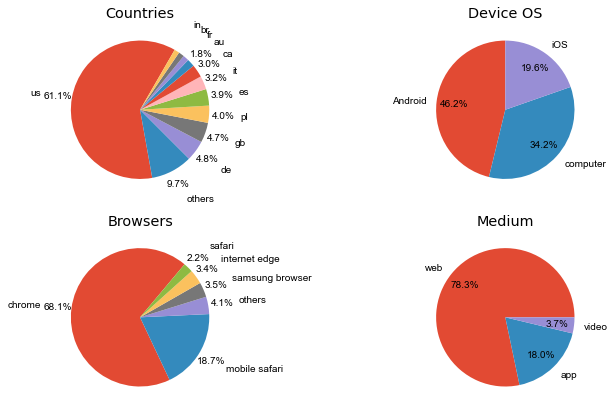

In [ ]:
# Conutry, devices, browsers, medium shares 

import matplotlib.pyplot as plt 


fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(12,7))

country=df.country_grouped.value_counts()
ax1.pie(x=country, 
        autopct=lambda x:(str(round(x,1))+'%') if x > 1.4 else '',
        pctdistance=1.2,
        labels=country.index,
        labeldistance=1.45,
        textprops={"family": "Arial", "size": 10},
        startangle=60)
ax1.set_title('Countries')

systems=df.os.value_counts()

ax2.pie(x=systems, 
        autopct=lambda x:(str(round(x,1))+'%') if x > 0 else '',
        pctdistance=0.75,
        labels=systems.index,
        labeldistance=1.15,
        startangle=90,
        textprops={"family": "Arial", "size": 10},)
ax2.set_title('Device OS')

brs=df.browsers.value_counts()
ax3.pie(x=brs, 
        autopct=lambda x:(str(round(x,1))+'%') if x > 0 else '',
        pctdistance=1.2,
        labels=brs.index,
        labeldistance=1.45,
        textprops={"family": "Arial", "size": 10},
        startangle=50,)
ax3.set_title('Browsers')


media=df.medium.value_counts()
ax4.pie(x=media, 
        autopct=lambda x:(str(round(x,1))+'%') if x > 0 else '',
        pctdistance=0.75,
        labels=media.index,
        labeldistance=1.15,
        textprops={"family": "Arial", "size": 10},)
ax4.set_title('Medium')
fig.savefig('media_browsers_os_country.png')

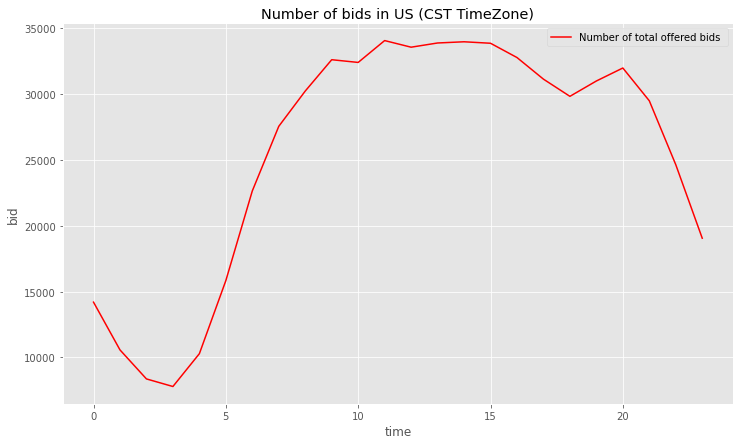

In [ ]:
# number of bids in US in time
plt.style.use('ggplot')
total_bid_count=df[df.country_grouped=='us'].groupby('time').bid.count()
fig,ax1 = plt.subplots(figsize=(12,7))
sns.lineplot(x=total_bid_count.index,y=total_bid_count,data=total_bid_count,color='red')

#total_bid_count.plot(kind='bar')
ax1.set_title('Number of bids in US (CST TimeZone)')
ax1.legend(labels=['Number of total offered bids '])
fig.savefig('all_bids_us.png')

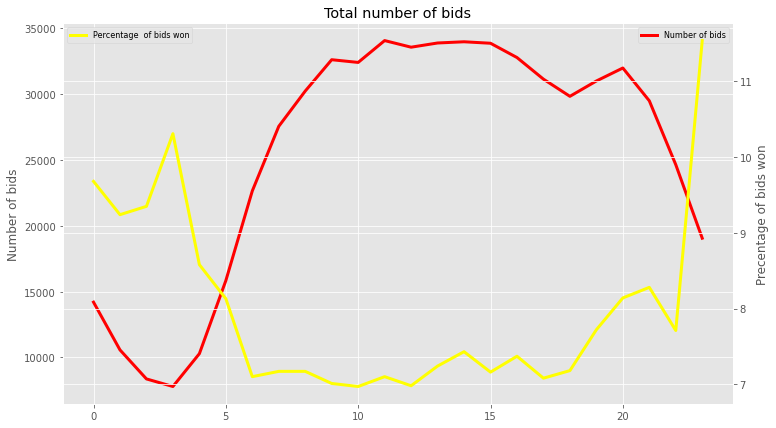

In [ ]:
# % of bid won in time 
# when buyrs won most 
import matplotlib.pyplot as plt 

total_bid_count=df[df.country_grouped=='us'].groupby('time').bid.count()
bid_percent=df[(df.country_grouped=='us')].groupby('time').win.agg(lambda x:round(sum(x)/len(x)*100,2))

fig, ax1 = plt.subplots(figsize=(12,7))
ax1.plot(total_bid_count.index,total_bid_count,c='red',linewidth=3)
ax1.set_title("Total number of bids")
ax1.legend(labels=['Number of bids'],fontsize=8)
ax1.set_ylabel('Number of bids')

ax2 = plt.twinx()

ax2.plot(bid_percent.index,bid_percent,c='yellow',linewidth=3)

ax2.legend(labels=['Percentage  of bids won'],fontsize=8)
ax2.set_ylabel('Precentage of bids won')

fig.savefig('procent_won_us.png')

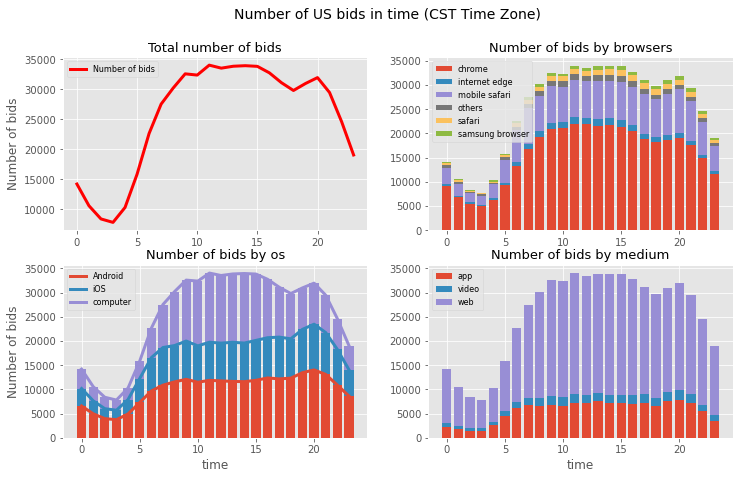

In [ ]:

# number of bids, number of bids per os/browser/medium, version with lines
import matplotlib.pyplot as plt 

def unstack_col(col_data):
    med=df[df.country_grouped=='us'].groupby(['time',col_data]).bid.count().reset_index().set_index(['time',col_data])
    med=med.unstack(level=-1).droplevel(level=0,axis=1)
    return med

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(12,7))
fig.suptitle('Number of US bids in time (CST Time Zone)', fontsize=14)


total_bid_count=df[df.country_grouped=='us'].groupby('time').bid.count()
#ax1
ax1.plot(total_bid_count.index,total_bid_count,c='red',linewidth=3)
#ax1.bar(total_bid_count.index,total_bid_count)
ax1.set_title("Total number of bids",fontsize=13)
ax1.legend(labels=['Number of bids'],fontsize=8)
ax1.set_ylabel('Number of bids')

#ax4
med=unstack_col('medium')
bot=0
for bar in med.columns:
    ax4.bar(med.index,med[bar],bottom=bot)
    bot+=med[bar]
ax4.set_title("Number of bids by medium",fontsize=13)
ax4.legend(list(med.columns),fontsize=8)
ax4.set_xlabel('time')

#ax2
med=unstack_col('browsers')
bot=0
for bar in med.columns:
    ax2.bar(med.index,med[bar],bottom=bot)
    bot+=med[bar]
ax2.set_title("Number of bids by browsers",fontsize=13)
ax2.legend(list(med.columns),fontsize=8,loc='best')

#ax3
med=unstack_col('os')
med_col=('Android','iOS','computer')
bot=0
for bar in med_col:
    ax3.bar(med.index,med[bar],bottom=bot)
    ax3.plot(med.index,med[bar]+bot,linewidth=3)
    bot+=med[bar]


ax3.set_title("Number of bids by os",fontsize=13)
ax3.legend(list(med_col),fontsize=8)
ax3.set_ylabel('Number of bids')
ax3.set_xlabel('time')
fig.savefig('number_of_bids_us.png')


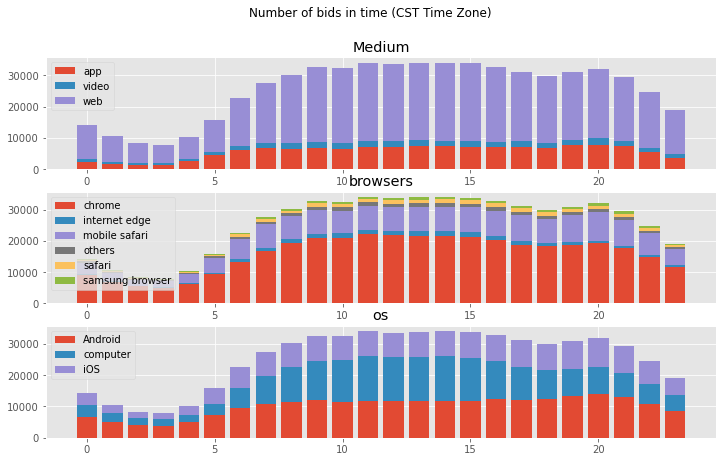

In [ ]:

# what media, os , browser buyers spent most of their budget
import matplotlib.pyplot as plt 

def unstack_col(col_data):
    med=df[df.country_grouped=='us'].groupby(['time',col_data]).bid.count().reset_index().set_index(['time',col_data])
    med=med.unstack(level=-1).droplevel(level=0,axis=1)
    return med

fig, (ax1,ax2,ax3) = plt.subplots(3,figsize=(12,7))
fig.suptitle('Number of bids in time (CST Time Zone)', fontsize=12)



med=unstack_col('medium')
bot=0
for bar in med.columns:
    ax1.bar(med.index,med[bar],bottom=bot)
    bot+=med[bar]
ax1.set_title("Medium")
ax1.legend(list(med.columns))


med=unstack_col('browsers')
bot=0
for bar in med.columns:
    ax2.bar(med.index,med[bar],bottom=bot)
    bot+=med[bar]
ax2.set_title("browsers")
ax2.legend(list(med.columns),loc='upper left')


med=unstack_col('os')
bot=0
for bar in med.columns:
    ax3.bar(med.index,med[bar],bottom=bot)
    bot+=med[bar]
ax3.set_title("os")
ax3.legend(list(med.columns))


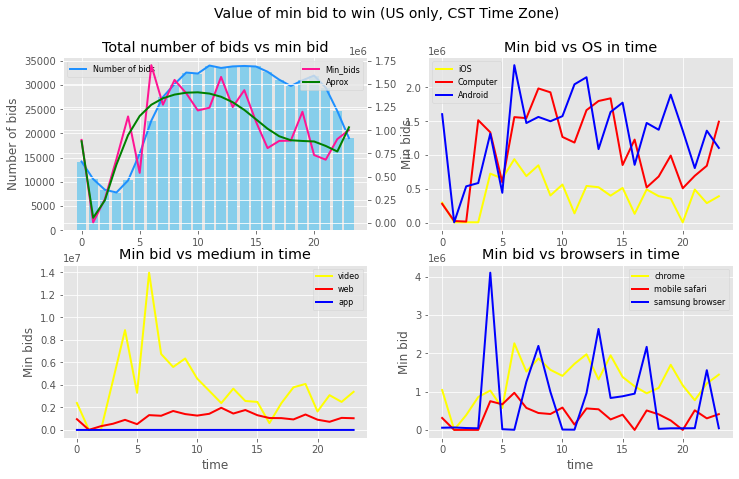

In [ ]:
# values of min bid (price asked) of  os,browser,medium in time
import matplotlib.pyplot as plt 
import numpy as np
plt.style.use('ggplot')


fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(12,7))
fig.suptitle('Value of min bid to win (US only, CST Time Zone)', fontsize=14)

#ax1
total_bid_count=df[df.country_grouped=='us'].groupby('time').bid.count()
ax1.bar(total_bid_count.index,total_bid_count,color='skyblue')
ax1.plot(total_bid_count.index,total_bid_count,color='dodgerblue',linewidth=2)

ax1.set_title("Total number of bids vs min bid")
ax1.legend(labels=['Number of bids','Min bids'],fontsize=8)
ax1.set_ylabel('Number of bids')
ax1_1 = ax1.twinx()

mean_min_bid=df[df.country_grouped=='us'].groupby("time").min_bid_to_win.mean()
ax1_1.plot(mean_min_bid.index,mean_min_bid,linewidth=2,color='deeppink')
aprox = np.poly1d(np.polyfit(mean_min_bid.index,mean_min_bid,10))

ax1_1.plot(mean_min_bid.index,aprox(mean_min_bid.index),'-',linewidth=2,color='green')
ax1.legend(labels=['Number of bids'],fontsize=8)
ax1_1.legend(labels=['Min_bids','Aprox'],fontsize=8)
ax1.set_ylabel('Number of bids')
ax1_1.set_ylabel('Min bids')


#ax2 
med=df[(df.country_grouped=='us') & (df.os=='iOS')].groupby('time').min_bid_to_win.mean()
ax2.plot(med.index,med,linewidth=2,color='yellow')

med=df[(df.country_grouped=='us') & (df.os=='computer')].groupby('time').min_bid_to_win.mean()
ax2.plot(med.index,med,linewidth=2,color='red')

med=df[(df.country_grouped=='us') & (df.os=='Android')].groupby('time').min_bid_to_win.mean()
ax2.plot(med.index,med,linewidth=2,color='blue')

ax2.set_title("Min bid vs OS in time")
ax2.legend(labels=['iOS','Computer','Android'],fontsize=8)

#ax3

med=df[(df.country_grouped=='us') & (df.medium=='video')].groupby('time').min_bid_to_win.mean()
ax3.plot(med.index,med,linewidth=2,color='yellow')

med=df[(df.country_grouped=='us') & (df.medium=='web')].groupby('time').min_bid_to_win.mean()
ax3.plot(med.index,med,linewidth=2,color='red')

med=df[(df.country_grouped=='us') & (df.medium=='app')].groupby('time').min_bid_to_win.mean()
ax3.plot(med.index,med,linewidth=2,color='blue')

ax3.set_title("Min bid vs medium in time")
ax3.legend(labels=['video','web','app'],fontsize=8)
ax3.set_xlabel('time')
ax3.set_ylabel('Min bids')

#ax4

med=df[(df.country_grouped=='us') & (df.browsers=='chrome')].groupby('time').min_bid_to_win.mean()
ax4.plot(med.index,med,linewidth=2,color='yellow')

med=df[(df.country_grouped=='us') & (df.browsers=='mobile safari')].groupby('time').min_bid_to_win.mean()
ax4.plot(med.index,med,linewidth=2,color='red')
med=df[(df.country_grouped=='us') & (df.browsers=='others')].groupby('time').min_bid_to_win.mean()
ax4.plot(med.index,med,linewidth=2,color='blue')

ax4.set_title("Min bid vs browsers in time")
ax4.legend(labels=['chrome','mobile safari','samsung browser'],fontsize=8)
ax4.set_xlabel('time')
ax4.set_ylabel('Min bid')

fig.savefig('min_bid.png')

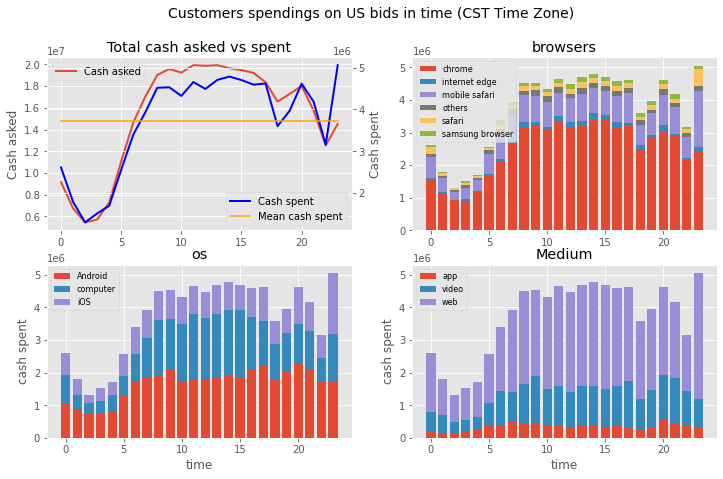

In [ ]:

# Buyers spendings in time
import matplotlib.pyplot as plt 

def unstack_col_cash(col_data):
    med=df[(df.country_grouped=='us')&(df.win==True)].groupby(['time',col_data]).bid.sum().reset_index().set_index(['time',col_data])
    med=med.unstack(level=-1).droplevel(level=0,axis=1)
    return med

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(12,7))
fig.suptitle('Customers spendings on US bids in time (CST Time Zone)', fontsize=14)

#ax1
bid_count=df[df.country_grouped=='us'].groupby('time').bid.sum()
bid_count_won=df[(df.country_grouped=='us')&(df.win==True)].groupby('time').bid.sum()
mean_won_bid_number=round(sum(df[(df.country=='us')&(df.win==True)].bid)/len(df.time.unique()),2)

ax1.plot(bid_count.index,bid_count,linewidth=2)
ax1_1 = ax1.twinx()
ax1_1.plot(bid_count_won.index,bid_count_won,linewidth=2,color='blue')
sns.lineplot(x=bid_count_won.index,y=mean_won_bid_number,ax=ax1_1,color='orange')

ax1.set_title("Total cash asked vs spent")
ax1.legend(labels=['Cash asked'],loc='upper left')
ax1_1.legend(labels=['Cash spent','Mean cash spent'])
ax1.set_ylabel('Cash asked')
ax1_1.set_ylabel('Cash spent')

med=unstack_col_cash('medium')
bot=0
for bar in med.columns:
    ax4.bar(med.index,med[bar],bottom=bot)
    bot+=med[bar]
ax4.set_title("Medium")
ax4.legend(list(med.columns),fontsize=8)
ax4.set_xlabel('time')
ax4.set_ylabel('cash spent')

med=unstack_col_cash('browsers')
bot=0
for bar in med.columns:
    ax2.bar(med.index,med[bar],bottom=bot)
    bot+=med[bar]
ax2.set_title("browsers")
ax2.legend(list(med.columns),fontsize=8,loc='best')


med=unstack_col_cash('os')
bot=0
for bar in med.columns:
    ax3.bar(med.index,med[bar],bottom=bot)
    bot+=med[bar]
ax3.set_title("os")
ax3.legend(list(med.columns),fontsize=8)
ax3.set_ylabel('Number of bids')
ax3.set_xlabel('time')
ax3.set_ylabel('cash spent')

fig.savefig('cash_of_bids_us.png')


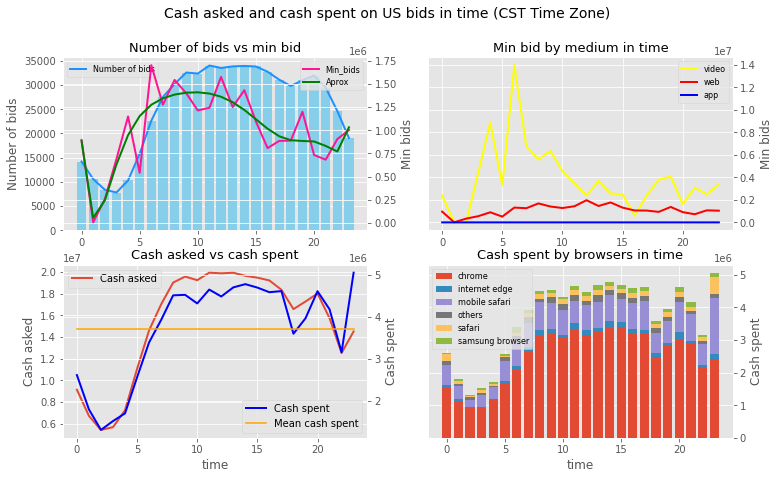

In [ ]:
# price and spendings final deck

import matplotlib.pyplot as plt 

def unstack_col_cash(col_data):
    med=df[(df.country_grouped=='us')&(df.win==True)].groupby(['time',col_data]).bid.sum().reset_index().set_index(['time',col_data])
    med=med.unstack(level=-1).droplevel(level=0,axis=1)
    return med

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(12,7))
fig.suptitle('Cash asked and cash spent on US bids in time (CST Time Zone)', fontsize=14)

#ax1
total_bid_count=df[df.country_grouped=='us'].groupby('time').bid.count()
ax1.bar(total_bid_count.index,total_bid_count,color='skyblue')
ax1.plot(total_bid_count.index,total_bid_count,color='dodgerblue',linewidth=2)

ax1.set_title("Number of bids vs min bid",fontsize=13)
ax1.legend(labels=['Number of bids','Min bids'],fontsize=8)
ax1.set_ylabel('Number of bids')
ax1_1 = ax1.twinx()

mean_min_bid=df[df.country_grouped=='us'].groupby("time").min_bid_to_win.mean()
ax1_1.plot(mean_min_bid.index,mean_min_bid,linewidth=2,color='deeppink')
aprox = np.poly1d(np.polyfit(mean_min_bid.index,mean_min_bid,10))

ax1_1.plot(mean_min_bid.index,aprox(mean_min_bid.index),'-',linewidth=2,color='green')
ax1.legend(labels=['Number of bids'],fontsize=8)
ax1_1.legend(labels=['Min_bids','Aprox'],fontsize=8)
ax1.set_ylabel('Number of bids')
ax1_1.set_ylabel('Min bids')

#ax2

med=df[(df.country_grouped=='us') & (df.medium=='video')].groupby('time').min_bid_to_win.mean()
ax2.plot(med.index,med,linewidth=2,color='yellow')

med=df[(df.country_grouped=='us') & (df.medium=='web')].groupby('time').min_bid_to_win.mean()
ax2.plot(med.index,med,linewidth=2,color='red')

med=df[(df.country_grouped=='us') & (df.medium=='app')].groupby('time').min_bid_to_win.mean()
ax2.plot(med.index,med,linewidth=2,color='blue')

ax2.set_title("Min bid by medium in time",fontsize=13)
ax2.legend(labels=['video','web','app'],fontsize=8)

ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
ax2.set_ylabel('Min bids')


#ax3
bid_count=df[df.country_grouped=='us'].groupby('time').bid.sum()
bid_count_won=df[(df.country_grouped=='us')&(df.win==True)].groupby('time').bid.sum()
mean_won_bid_number=round(sum(df[(df.country=='us')&(df.win==True)].bid)/len(df.time.unique()),2)

ax3.plot(bid_count.index,bid_count,linewidth=2)
ax3_1 = ax3.twinx()
ax3_1.plot(bid_count_won.index,bid_count_won,linewidth=2,color='blue')
sns.lineplot(x=bid_count_won.index,y=mean_won_bid_number,ax=ax3_1,color='orange')

ax3.set_title("Cash asked vs cash spent",fontsize=13)
ax3.legend(labels=['Cash asked'],loc='upper left')
ax3_1.legend(labels=['Cash spent','Mean cash spent'])
ax3.set_ylabel('Cash asked')
ax3_1.set_ylabel('Cash spent')
ax3.set_xlabel('time')

#ax4
med=unstack_col_cash('browsers')
bot=0
for bar in med.columns:
    ax4.bar(med.index,med[bar],bottom=bot)
    bot+=med[bar]
ax4.set_title("Cash spent by browsers in time",fontsize=13)
ax4.legend(list(med.columns),fontsize=8,loc='best')
ax4.yaxis.set_label_position("right")
ax4.yaxis.tick_right()
ax4.set_ylabel('Cash spent')
ax4.set_xlabel('time')


fig.savefig('cash_asked_cash_spent.png')


#### Hypothesis testing 

Hypothesis is minimal bid (green line uppe left chart above) and number of total bid are (blue line ) correlated. 
Null hypothesis is minimal bid and totat bid are not correlated 

In [ ]:
# Hypothesis testing with hacker statistcs (bootstraping samples) 
total_bid_count=df[df.country_grouped=='us'].groupby('time').bid.count().to_numpy() # number of all bids
mean_min_bid=df[df.country_grouped=='us'].groupby("time").min_bid_to_win.mean() #mean min bid 
aprox = np.poly1d(np.polyfit(mean_min_bid.index,mean_min_bid,10))
mean_min_bid_poly=np.array([aprox(i) for i in total_bid_count])


kor_sample = np.corrcoef(total_bid_count, mean_min_bid_poly)[0,1]

# confidence interval 
conf_int=np.empty(1000)
for k in range(1000):
    ind=np.empty(len(total_bid_count),dtype=int)
    for i in range(len(total_bid_count)):
        ind[i]=np.random.choice(np.arange(len(total_bid_count)))
    conf_int[k]=np.corrcoef(total_bid_count[ind], mean_min_bid_poly[ind])[0,1]

print('Pearson correlation :',kor_sample,' Confidence interval ', np.percentile(conf_int,[2.5,97.5]))

# hypothesis testing 
perm_kor= np.empty(10000)
for i in range(10000):
    perm_kor[i]=np.corrcoef(total_bid_count,np.random.permutation(mean_min_bid_poly))[0,1]

pvalue=np.sum(perm_kor>=kor_sample)/len(perm_kor)

print('p_value',pvalue)

Pearson correlation : 0.8112959543123479  Confidence interval  [0.74812737 0.87825504]
p_value 0.0


In [ ]:
#Same hypothesis, but with scipy pearsonr fucntion. 
import scipy.stats as stats
p_stat=stats.pearsonr(total_bid_count, mean_min_bid_poly)
print('Pearson correlation ', p_stat[0], '\np_value:',p_stat[1])


Pearson correlation  0.8112959543123481 
p_value: 1.5104983645376795e-06


Null hypothesis rejected. Min bid and total bid are correlated